# Import Libraries


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Load and Inspect Dataset


In [3]:

df = pd.read_csv(r"global air pollution dataset.csv")

print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Dataset shape: (23463, 12)
Missing values:
 Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


# Data Preprocessing and Encoding

In [9]:

df.dropna(subset=['Country'], inplace=True)

category_cols = ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
label_encoders = {}

for col in category_cols:
    df[col] = df[col].fillna('Unknown')  # Add this line
    le = LabelEncoder()
    df[col + ' Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

print(f"Encoded Data Shape: {df.shape}")
df.head()



Encoded Data Shape: (23036, 16)


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,CO AQI Category Encoded,Ozone AQI Category Encoded,NO2 AQI Category Encoded,PM2.5 AQI Category Encoded
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0,0,0,2
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0,0,0,0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0,0,0,2
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0,0,0,0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0,0,0,0


# AQI Value Distribution Plot

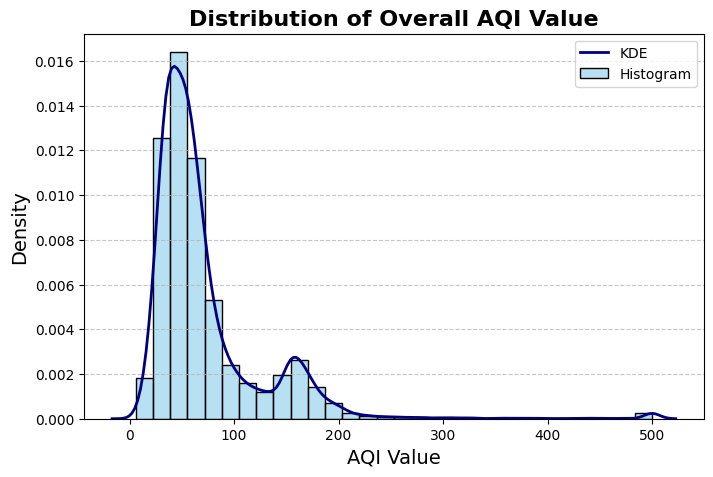

In [13]:
plt.figure(figsize=(8, 5))

sns.histplot(df['AQI Value'], bins=30, color='skyblue', stat='density', alpha=0.6, label='Histogram')

sns.kdeplot(df['AQI Value'], color='navy', linewidth=2, label='KDE')

plt.title('Distribution of Overall AQI Value', fontsize=16, fontweight='bold')
plt.xlabel('AQI Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Pollutant Category Distribution by AQI Category

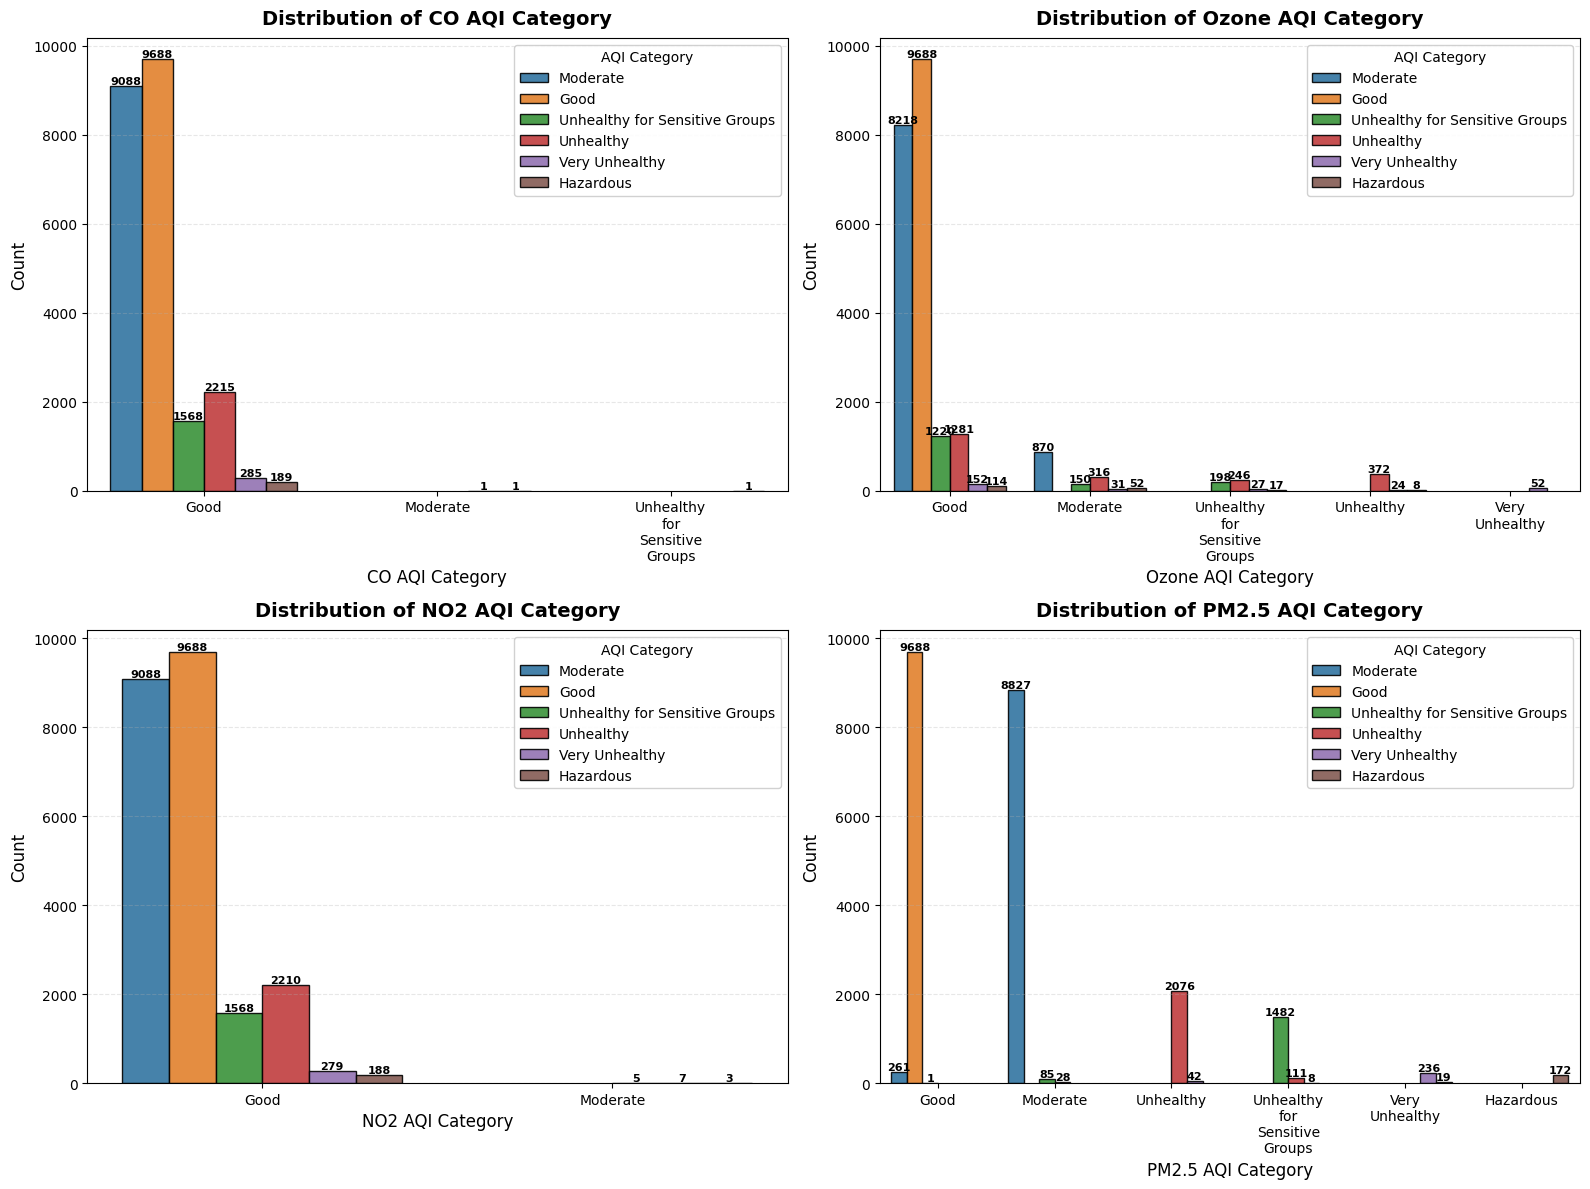

In [ ]:
from textwrap import wrap

plt.figure(figsize=(16, 12))

plt.subplots_adjust(hspace=0.4) 

for i, col in enumerate(category_cols):
    plt.subplot(2, 2, i+1)
    
    ax = sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index,
        hue='AQI Category',
        palette='tab10',  
        edgecolor='black',
        alpha=0.9  
    )
    
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    positions = range(len(ax.get_xticklabels()))
    labels = [l.get_text() for l in ax.get_xticklabels()]
    
    wrapped_labels = ['\n'.join(wrap(label, 10)) for label in labels]
    
    ax.set_xticks(positions)
    ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.legend(title='AQI Category', loc='upper right', frameon=True, framealpha=0.9)
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                      (p.get_x() + p.get_width()/2., height),
                      ha='center', va='bottom', 
                      fontsize=8,
                      fontweight='bold')
            
plt.tight_layout()
plt.show()

# Feature Correlation Analysis

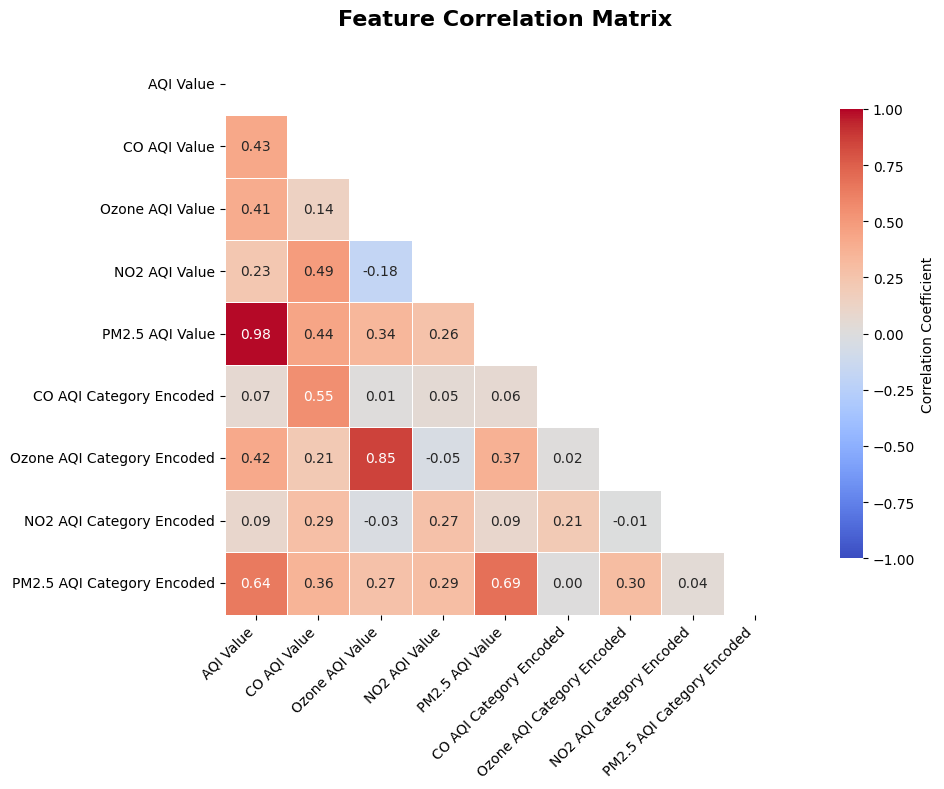

In [26]:
import numpy as np

plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    annot=True,
    mask=mask,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot_kws={"size": 10},
    linewidths=0.5,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()